In [1]:
#Loading the necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# From an URL
# url = 'url link'
# pd.read_table(url)
# pd.read_table(url ,sep=',')


In [46]:
#Loading the file from a csv
input_data=pd.read_csv('beer.csv')
#first few rows
input_data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [3]:
#Path
# pd.read_csv(r'path') to remove the / to \

In [67]:
#changing the index
input_data.drop('Unnamed: 0',inplace=True,axis=1)



In [47]:
input_data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [48]:
#Alternate method
# input_data=pd.read_csv('beer.csv',index_col='Unnamed: 0')

In [49]:
#Basic details of the data set
input_data.shape
#193 rows and 6 columns

(193, 7)

In [51]:
input_data.info()
#column name with the type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [52]:
#checking for null values
input_data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [53]:
#Filling the missing values using median
input_data.dtypes

Unnamed: 0                        int64
country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [ ]:
#Both numerical and catergorical data present

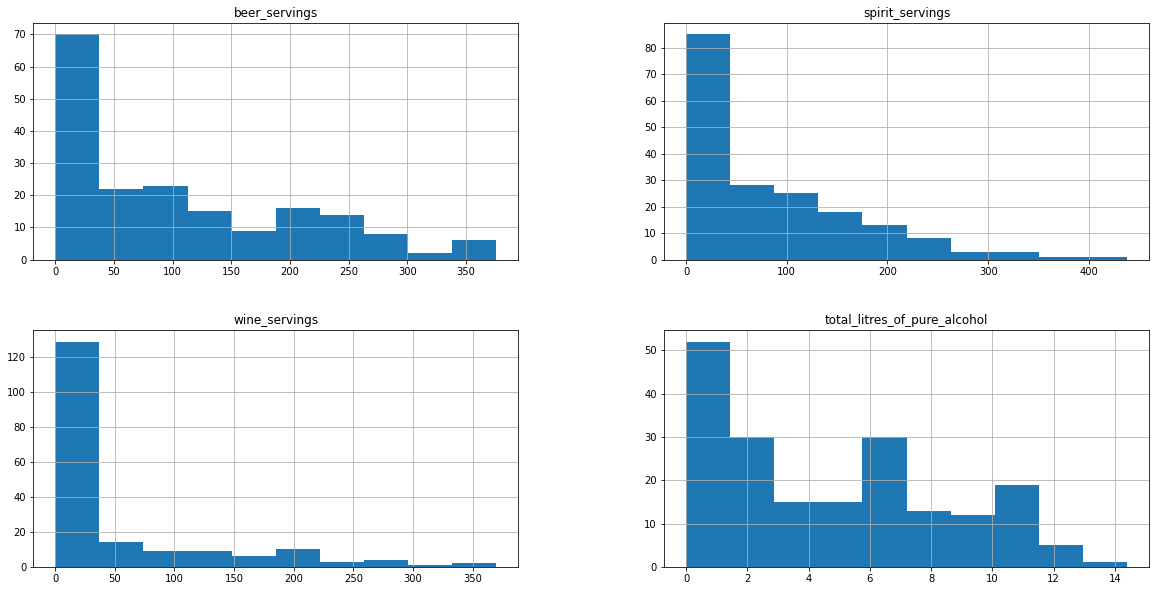

In [54]:
#Cheking skewness to plot frequency graph
frequency_graph=input_data.select_dtypes(include=['float'])
frequency_graph.hist(figsize=(20,10))
plt.show()

In [ ]:
#Right Skewed

In [55]:
#Getting coloumn name
input_data.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [56]:
#Filling null value 
input_data['beer_servings']=input_data['beer_servings'].fillna(input_data['beer_servings'].median())


In [57]:
input_data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [58]:
#Filling the null value using a loop
for i in ['spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']:
  input_data[i]=input_data[i].fillna(input_data[i].median())

In [59]:
#Checking the null value after filling
input_data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [60]:
#Group function
input_data.groupby('continent')['beer_servings'].median()


continent
Africa            32.0
Asia              21.0
Europe           206.0
North America    143.0
Oceania           52.5
South America    129.0
Name: beer_servings, dtype: float64

In [61]:
input_data.groupby('continent')['beer_servings'].sum()


continent
Africa           3258.0
Asia             1787.0
Europe           8587.0
North America    3345.0
Oceania          1435.0
South America    1644.0
Name: beer_servings, dtype: float64

In [62]:
input_data.groupby('continent')['beer_servings'].max()

continent
Africa           376.0
Asia             247.0
Europe           361.0
North America    285.0
Oceania          306.0
South America    245.0
Name: beer_servings, dtype: float64

In [63]:
input_data.groupby('continent')['beer_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,40.613636,49.491938,0.0,5.00,21.0,66.25,247.0
Europe,45.0,190.822222,100.280808,0.0,109.00,206.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,137.000000,55.065251,76.0,88.75,129.0,164.00,245.0


In [64]:
#Checking unique values
input_data.country.nunique()

193

In [65]:
#193 countries in the input file
#Since countries are unique we are droping in 
input_data.drop('country', axis=1, inplace=True)


In [68]:
input_data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


Text(0.5, 1.0, 'Boxplot of beer servings')

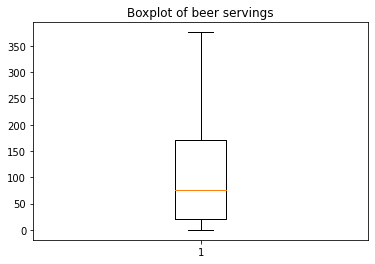

In [71]:
#Handling outliers
#Boxplot to find out outlier
#Ploting the beer service to check the outlier or not
plt.boxplot(input_data['beer_servings'])
plt.title('Boxplot of beer servings')

Text(0.5, 1.0, 'Boxplot of spirit_servings')

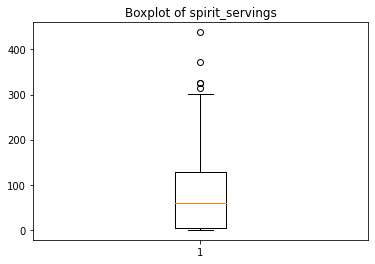

In [72]:
#Ploting the beer service to check the outlier or not
plt.boxplot(input_data['spirit_servings'])
plt.title('Boxplot of spirit_servings')

In [74]:
#Outlier present so we need to eliminate the same
Q1=np.percentile(input_data['spirit_servings'], 25, interpolation='midpoint')
Q2=np.percentile(input_data['spirit_servings'], 50, interpolation='midpoint')
Q3=np.percentile(input_data['spirit_servings'], 75, interpolation='midpoint')

In [75]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [76]:
input_data['spirit_servings'].median()

60.0

In [77]:
IQR=Q3-Q1
print(IQR)

123.0


In [78]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

-179.5
312.5


In [79]:
#Finding the Outliers in the Spirit_servings
outlier=[]
for x in input_data['spirit_servings']:
  if((x>upper_limit) or (x<low_limit)):
    outlier.append(x)

In [80]:
#Displaying the values
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [81]:
#Getting the index
index_value=input_data['spirit_servings']>upper_limit
input_data.loc[index_value].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [82]:
#Droping the values
input_data.drop([15, 68, 73, 141, 144], inplace=True)

Text(0.5, 1.0, 'Boxplot of spirit_servings After Outlier removal')

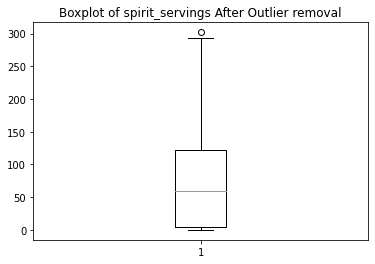

In [83]:
#Checking the outlier
plt.boxplot(input_data['spirit_servings'])
plt.title('Boxplot of spirit_servings After Outlier removal')

Text(0.5, 1.0, 'Boxplot of wine_servings')

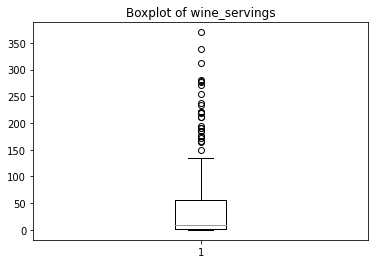

In [84]:
#Cheking the wine service 
plt.boxplot(input_data['wine_servings'])
plt.title('Boxplot of wine_servings')

In [86]:
#lot of outlier present so we need to remove
#Find Q1,Q2,Q3 for wine
Q1=np.percentile(input_data['wine_servings'], 25, interpolation='midpoint')
Q2=np.percentile(input_data['wine_servings'], 50, interpolation='midpoint')
Q3=np.percentile(input_data['wine_servings'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
57.5


In [89]:
#Checking the median value
input_data['wine_servings'].median()

9.0

In [90]:
#Finding the IQR value
IQR=Q3-Q1
print(IQR)

56.5


In [91]:
#Checking the limits 
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

-83.75
142.25


In [92]:
#Finding the Outliers in the Spirit_servings
outlier=[]
for x in input_data['wine_servings']:
  if((x>upper_limit) or (x<low_limit)):
    outlier.append(x)

In [93]:
#Displaying the values
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [94]:
#Getting the index
index_value=input_data['spirit_servings']>upper_limit
input_data.loc[index_value].index

Int64Index([  7,  11,  14,  21,  23,  25,  36,  40,  44,  45,  50,  51,  57,
             61,  72,  75,  85,  87,  93,  96,  98, 112, 125, 133, 134, 135,
            139, 143, 145, 155, 160, 163, 169, 174, 180, 184],
           dtype='int64')

In [96]:
#Droping the values
input_data.drop([ 7,  11,  14,  21,  23,  25,  36,  40,  44,  45,  50,  51,  57, 61,  72,  75,  85,  87,  93,  96,  98, 112, 125, 133, 134, 135, 139, 143, 145, 155, 160, 163, 169, 174, 180, 184], inplace=True)

Text(0.5, 1.0, 'Boxplot of wine_servings After Outlier removal')

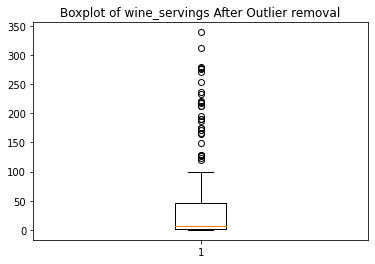

In [98]:
#After the removal of Outlier 
plt.boxplot(input_data['wine_servings'])
plt.title('Boxplot of wine_servings After Outlier removal')

In [99]:
input_data.shape

(152, 5)

In [101]:
#Encoding
#Continet is a categorial value so ML cannot take it into account
#One hot encoding
input_data.continent.nunique()

6

6

In [102]:
input_data=pd.get_dummies(input_data)

In [103]:
input_data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,89.0,132.0,54.0,4.9,0,0,1,0,0,0
2,25.0,0.0,14.0,0.7,1,0,0,0,0,0
3,245.0,138.0,312.0,12.4,0,0,1,0,0,0
4,217.0,57.0,45.0,5.9,1,0,0,0,0,0


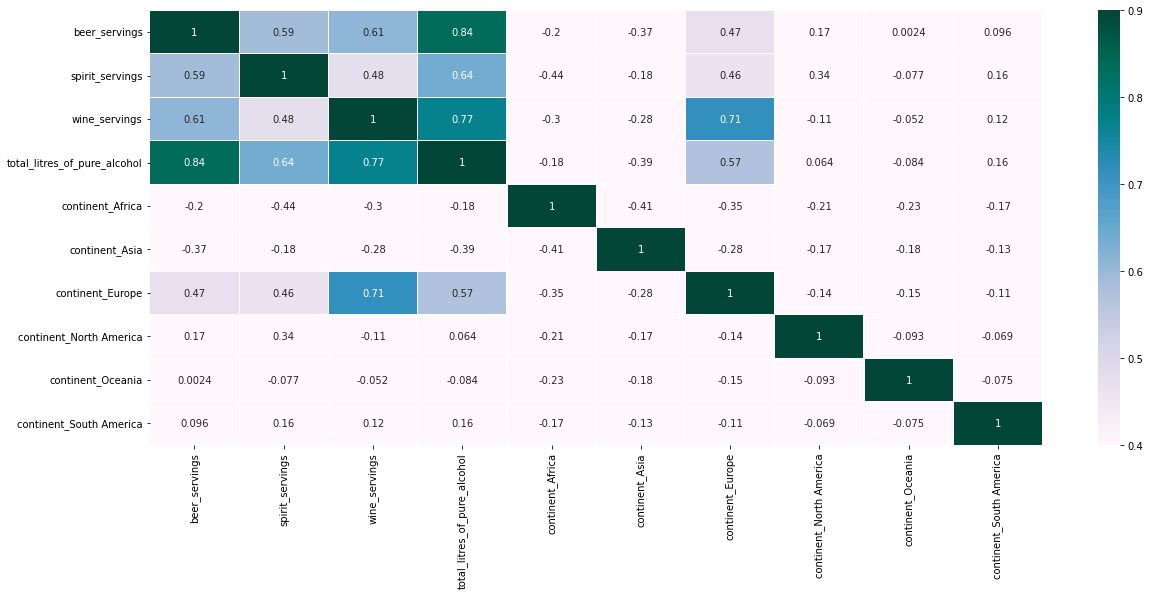

In [117]:
#Taking the corelation matrix
corelation_matrix=input_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corelation_matrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='PuBuGn')

In [118]:
#Creating a linear regression model
input_data.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [125]:
#Variables
y=input_data['total_litres_of_pure_alcohol']
x=input_data.drop('total_litres_of_pure_alcohol', axis=1)

In [126]:
#Creating Test and Train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [129]:
#Model creation
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predicitons=model.predict(x_test)

In [130]:
from sklearn.metrics import mean_squared_error
print('MSE:',mean_squared_error(y_test,predicitons))

MSE: 1.1573041267584063


In [136]:
from sklearn.metrics import r2_score
print('R2:',r2_score(y_test,predicitons))


R2: 0.8517913900418401


In [137]:
#Standard scaling
x.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,88.355263,44.973684,48.361842,0.342105,0.243421,0.190789,0.078947,0.092105,0.052632
std,94.673045,43.858132,82.640252,0.475983,0.430566,0.394222,0.270548,0.290130,0.224035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.500000,35.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,141.000000,75.250000,46.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,138.000000,339.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
type(x)

pandas.core.frame.DataFrame

In [139]:
#Scaling
from sklearn import preprocessing


In [141]:
standardisation = preprocessing.StandardScaler()
x= standardisation.fit_transform(x)


In [142]:
x=pd.DataFrame(x)

In [143]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,1.520000e+02,1.520000e+02,1.520000e+02,152.000000,1.520000e+02,1.520000e+02,1.520000e+02,1.520000e+02,1.520000e+02
mean,-2.118189e-17,7.523222e-17,8.764919e-18,0.000000,-5.989361e-17,-2.045148e-17,-3.272236e-16,7.961468e-17,-5.222431e-17
std,1.003306e+00,1.003306e+00,1.003306e+00,1.003306,1.003306e+00,1.003306e+00,1.003306e+00,1.003306e+00,1.003306e+00
min,-9.363525e-01,-1.028825e+00,-5.871439e-01,-0.721110,-5.672205e-01,-4.855640e-01,-2.927700e-01,-3.185110e-01,-2.357023e-01
25%,-7.667912e-01,-9.601969e-01,-5.750032e-01,-0.721110,-5.672205e-01,-4.855640e-01,-2.927700e-01,-3.185110e-01,-2.357023e-01
50%,-3.799793e-01,-2.281596e-01,-5.021594e-01,-0.721110,-5.672205e-01,-4.855640e-01,-2.927700e-01,-3.185110e-01,-2.357023e-01
75%,5.579072e-01,6.926060e-01,-2.260396e-02,1.386750,-5.672205e-01,-4.855640e-01,-2.927700e-01,-3.185110e-01,-2.357023e-01
max,3.048340e+00,2.128085e+00,3.528534e+00,1.386750,1.762983e+00,2.059461e+00,3.415650e+00,3.139609e+00,4.242641e+00


In [144]:
#Linear Model Checking
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predicitons=model.predict(x_test)
print('MSE:',mean_squared_error(y_test,predicitons))
print('R2:',r2_score(y_test,predicitons))

MSE: 1.1573041267584074
R2: 0.8517913900418399


In [145]:
#Min max scaling
x=input_data.drop('total_litres_of_pure_alcohol', axis=1)

In [146]:
x.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,88.355263,44.973684,48.361842,0.342105,0.243421,0.190789,0.078947,0.092105,0.052632
std,94.673045,43.858132,82.640252,0.475983,0.430566,0.394222,0.270548,0.290130,0.224035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.500000,35.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,141.000000,75.250000,46.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,138.000000,339.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [149]:
x=min_max.fit_transform(x)

In [150]:
x=pd.DataFrame(x)

In [151]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.234987,0.325896,0.142660,0.342105,0.243421,0.190789,0.078947,0.092105,0.052632
std,0.251790,0.317813,0.243777,0.475983,0.430566,0.394222,0.270548,0.290130,0.224035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042553,0.021739,0.002950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.139628,0.253623,0.020649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.375000,0.545290,0.137168,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
#Linear Model Checking
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predicitons=model.predict(x_test)
print('MSE:',mean_squared_error(y_test,predicitons))
print('R2:',r2_score(y_test,predicitons))

MSE: 1.157304126758406
R2: 0.8517913900418401


In [155]:
#Normalisation
x=input_data.drop('total_litres_of_pure_alcohol', axis=1)
x.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,88.355263,44.973684,48.361842,0.342105,0.243421,0.190789,0.078947,0.092105,0.052632
std,94.673045,43.858132,82.640252,0.475983,0.430566,0.394222,0.270548,0.290130,0.224035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.500000,35.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,141.000000,75.250000,46.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,138.000000,339.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [156]:
x=preprocessing.normalize(x)


In [157]:
x=pd.DataFrame(x)

In [158]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.664713,0.377708,0.235871,0.033945,0.049642,0.013926,0.000536,0.007918,0.000295
std,0.320539,0.316529,0.276863,0.143258,0.196422,0.114259,0.002014,0.081165,0.001331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.487437,0.112282,0.018244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.764832,0.299971,0.100922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.943820,0.613437,0.402409,0.012250,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.999961,0.996860,0.940272,1.000000,1.000000,1.000000,0.011570,1.000000,0.009300


In [159]:
#Linear Model Checking
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predicitons=model.predict(x_test)
print('MSE:',mean_squared_error(y_test,predicitons))
print('R2:',r2_score(y_test,predicitons))

MSE: 460.98211206480227
R2: -58.035059553506215


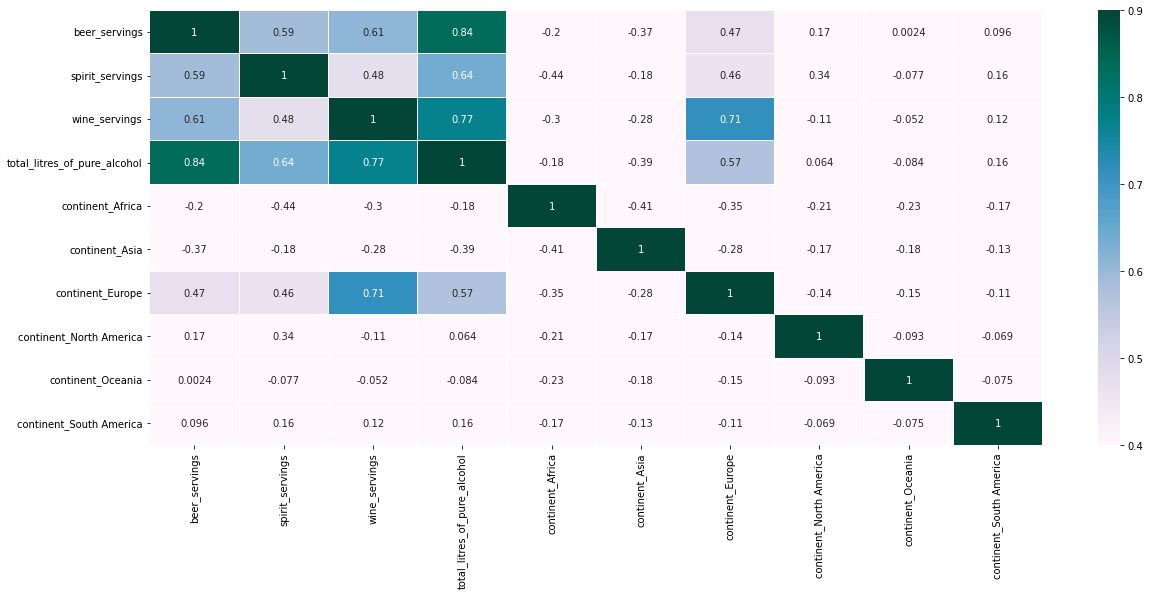

In [160]:
#Feature reducution
#Taking the corelation matrix
corelation_matrix=input_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corelation_matrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='PuBuGn')

In [164]:
input_data.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [166]:
#Droping highly corelated columns
input_data.drop(['spirit_servings', 'wine_servings'],axis=1,inplace=True)

In [167]:
#Linear Model Checking
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predicitons=model.predict(x_test)
print('MSE:',mean_squared_error(y_test,predicitons))
print('R2:',r2_score(y_test,predicitons))

MSE: 460.98211206480227
R2: -58.035059553506215
